# Многомерная линейная регрессия

Применим многомерную линейную регрессию для предсказания цены дома. Допустим, мы продаем дом и хотим узнать наиболее приемлемую цену продажи.
Файл `ex1data2.csv` содержит набор данных из цен домов в городе Портленд штата Орегон. Первый столбец это размер дома (в квадратных футах), второй столбец — число спален в доме, третий столбец — цена дома.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

In [2]:
headers = ['house_size', 'bedrooms', 'price']
df = pd.read_csv("ex1data2.csv", names=headers)

In [3]:
df.head()

,house_size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
x = df[['house_size', 'bedrooms']]
y = df['price']

In [5]:
x.head()

,house_size,bedrooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


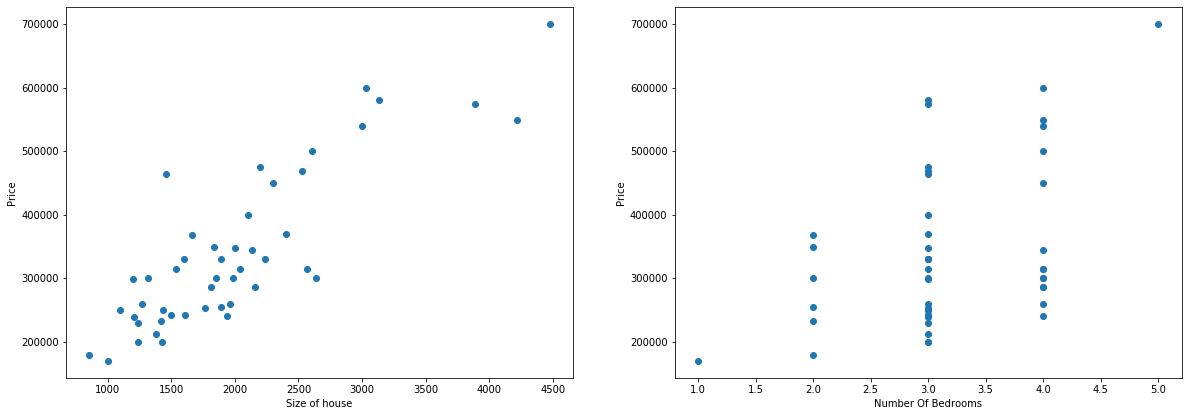

In [6]:
plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.scatter(df.house_size, df.price)
plt.ylabel('Price')
plt.xlabel('Size of house')

plt.subplot(222)
plt.scatter(df.bedrooms, df.price)
plt.ylabel('Price')
plt.xlabel('Number Of Bedrooms')

plt.show()

In [7]:
lm = LinearRegression()

In [8]:
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print('Y = {0} + {1} X_1 + {2} X_2'.format(lm.intercept_, lm.coef_[0], lm.coef_[1]))

Y = 89597.90954279748 + 139.21067401762554 X_1 + -8738.019112327831 X_2


In [10]:
Y_hat = lm.predict(x)

In [11]:
Rcross = cross_val_score(lm, x, y, cv=4)

Rcross

array([0.71087896, 0.76688719, 0.56424494, 0.41942055])

In [12]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.6153579115451695 and the standard deviation is 0.13517523502115578


In [13]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [14]:
pr = PolynomialFeatures(degree=2)

In [15]:
x_pr = pr.fit_transform(x)

In [16]:
poly = LinearRegression()
poly.fit(x_pr, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
np.poly1d(poly)

poly1d([LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)],
      dtype=object)

In [18]:
poly.score(x_pr, y)

0.7546766615802141

In [19]:
Rcross_pr = cross_val_score(poly, x_pr, y, cv=4)

Rcross_pr

array([0.75015862, 0.58193068, 0.21819254, 0.39574532])

In [20]:
print("The mean of the folds are", Rcross_pr.mean(), "and the standard deviation is" , Rcross_pr.std())

The mean of the folds are 0.4865067887471358 and the standard deviation is 0.1992788183977634


In [22]:
PlotPolly(poly, x_pr, y, 'Test')

TypeError: 'LinearRegression' object is not callable